In [0]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
df = pd.read_csv("https://raw.githubusercontent.com/jvanlier/TIAS_ML_DL/master/Day1Notebooks/data/Mall_Customers.csv")
df.columns = ["CustomerID", "Gender", "Age", "Income", "Spending"]
df.head()

,CustomerID,Gender,Age,Income,Spending
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [0]:
df.tail()

,CustomerID,Gender,Age,Income,Spending
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


# Pre-processing

We need to do some pre-processing before we can cluster this dataset.

Obviously CustomerID is isn't informative, so we can drop that:

In [0]:
# YOUR CODE HERE
df = df.drop("CustomerID", axis=1)

In [0]:
df.head()

,Gender,Age,Income,Spending
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


### OneHotEncoding

Let's move on to Gender. It is a string, but strings can't be inserted into a Machine Learning algorithm. Let's take a look:

In [0]:
df["Gender"].value_counts()

Female    112
Male       88
Name: Gender, dtype: int64

Ok, only two genders in this dataset. We can *One Hot Encode* this into a new variable `isFemale`.

You can call the `.map()` function on any column in a DataFrame, to map or convert all values in that column to new values. The *mapping* needs to be specified as a *dictionary*.

For example, to map `Foo` to 1, and `Bar` to 2, you would pass the following dictionary to `map()`:

```
{"Foo": 1,
 "Bar": 2}
```

In [0]:
df["isFemale"] = df["Gender"].map({"Female": 1, "Male": 0})

Now, we can drop Gender column:

In [0]:
df = df.drop("Gender", axis=1)

In [0]:
df.head()

,Age,Income,Spending,isFemale
0,19,15,39,0
1,21,15,81,0
2,20,16,6,1
3,23,16,77,1
4,31,17,40,1


### Standardizing

Finally, we should standardize the variables such that they're on the same scale.

Most scikit-learn experts would use `sklearn.preprocessing.StandardScaler`, but it is a bit complicated to use. We can also do this ourselves quite easily.

A simple way to standardize values, is to subtract the mean, and divide the result by the standard deviation.

You can get the mean and standard deviation like this:

    df["column"].mean()
    df["column"].std()

In [0]:
df_scaled = df.copy()

for col in df_scaled.columns:
    print(f"{col} has mean {df[col].mean()}")
    df_scaled[col] = (df[col] - df[col].mean()) / df[col].std()

Age has mean 38.85
Income has mean 60.56
Spending has mean 50.2
isFemale has mean 0.56


In [0]:
for col in df_scaled.columns:
    print(f"{col} has mean {df_scaled[col].mean()}")

Age has mean -1.27675647831893e-16
Income has mean 1.2434497875801754e-16
Spending has mean -1.2212453270876723e-16
isFemale has mean -2.020605904817785e-16


Did you think about operator precedence? Remember that `/` is evaluated before `-`. Use brackets appropriately.

Let's see the result:

In [0]:
df_scaled.head()

,Age,Income,Spending,isFemale
0,-1.421003,-1.734646,-0.433713,-1.125328
1,-1.277829,-1.734646,1.192711,-1.125328
2,-1.349416,-1.696572,-1.711618,0.884186
3,-1.134655,-1.696572,1.037814,0.884186
4,-0.561958,-1.658498,-0.394989,0.884186


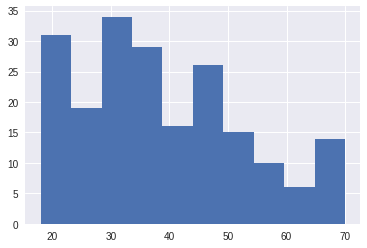

In [0]:
df["Age"].hist()

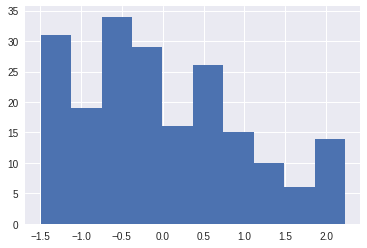

In [0]:
df_scaled["Age"].hist()

# Clustering

In [0]:
from sklearn.cluster import KMeans

Now, initialize KMeans with 3 clusters. Refer to the [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html) if needed.

Also, make sure to use `random_state=42` to ensure we all get the same results.

In [0]:
kmeans = KMeans(n_clusters=3, random_state=42)

Fit to `df_scaled`:

In [0]:
kmeans.fit(df_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=42, tol=0.0001, verbose=0)

Predict `df_scaled`:

In [0]:
clusters = kmeans.predict(df_scaled)

In [0]:
clusters = kmeans.fit_predict(df_scaled)  # same as separate fit() and predict()

Let's take a look at the clusters:

In [0]:
clusters

array([0, 0, 1, 0, 1, 0, 1, 0, 2, 0, 2, 0, 1, 0, 2, 0, 1, 0, 2, 0, 2, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 2, 0, 2, 0, 1, 0, 1, 0, 1, 0, 1, 0, 2, 0,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 2, 1, 2, 1, 2, 0, 2, 2, 0, 1, 1, 2, 0,
       1, 1, 0, 1, 2, 1, 1, 1, 2, 0, 1, 2, 0, 1, 2, 2, 2, 1, 0, 2, 1, 0,
       0, 1, 1, 0, 2, 1, 1, 0, 1, 0, 2, 0, 0, 1, 2, 0, 2, 0, 1, 2, 2, 2,
       2, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 2, 0, 2, 0, 2, 0,
       1, 0, 2, 0, 1, 0, 2, 0, 1, 0, 1, 0, 2, 0, 2, 0, 1, 0, 2, 0, 1, 0,
       1, 0, 2, 0, 2, 0, 1, 0, 2, 0, 2, 0, 2, 0, 1, 0, 2, 0, 2, 0, 1, 0,
       2, 0, 2, 0, 1, 0, 2, 0, 1, 0, 1, 0, 1, 0, 1, 0, 2, 0, 1, 0, 1, 0,
       2, 0], dtype=int32)

Ok, this doesn't make a lot of sense yet. Let's add these to the original data:

In [0]:
df_cluster = df.copy().assign(cluster=clusters)
df_cluster.head()

,Age,Income,Spending,isFemale,cluster
0,19,15,39,0,0
1,21,15,81,0,0
2,20,16,6,1,1
3,23,16,77,1,0
4,31,17,40,1,1


Now we have to figure out if these clusters make sense. Maybe we can describe each cluster and assign names to them? We are now going to have to make some plots to figure out in what way the clusters differ.

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


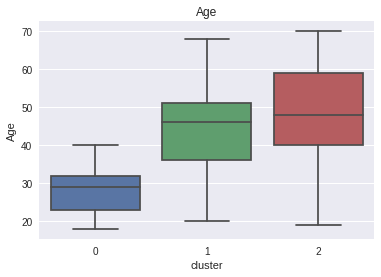

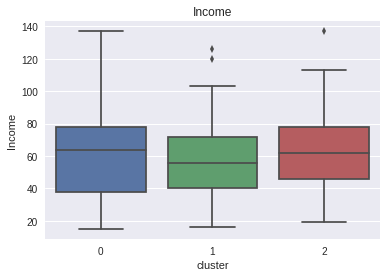

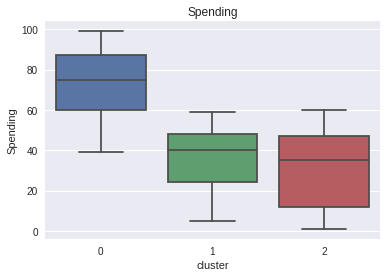

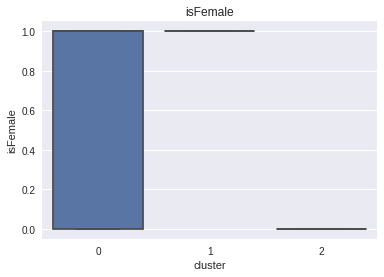

In [0]:
for col in [c for c in df.columns if c != "cluster"]:
  sns.boxplot(x="cluster", y=col, data=df_cluster)
  plt.title(col)
  plt.show()

Exercise: check out all variables and see how the clusters differ. Boxplots are good, but you might also like `violinplot`.


It's also nice to visualize them in a scatterplot:

Text(0, 0.5, 'Spending')

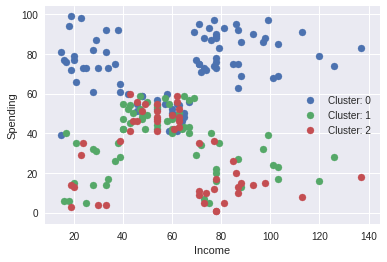

In [0]:
x = "Income" 
y = "Spending"

for cluster in df_cluster["cluster"].unique():
    df_cluster_single = df_cluster[df_cluster["cluster"] == cluster]
    plt.scatter(df_cluster_single[x], df_cluster_single[y], label=f"Cluster: {cluster}")
plt.legend()
plt.xlabel(x)
plt.ylabel(y)

**Exercise**:

Think of a name for each cluster, based on their properties!

- Cluster 0: Yuppen
- Cluster 1:
- Cluster 2: Lifelong hobo's


# Open ended bonus assignments
- Try increasing the number of clusters. Do you (still) get sensible results?
- Do 10 fits, with number of clusters from 1 to 10. For each fit, grab the `_intertia` value. Plot this in a graph and perform the *elbow method* to find the optimal number of clusters.
- Try clustering the wine quality dataset and see what interesting things you can find.

In [0]:
ks = list(range(1, 30))
inertias = []
for k in ks:
  inertias.append(KMeans(n_clusters=k).fit(df_scaled).inertia_)

Text(0.5, 1.0, 'Elbow method plot')

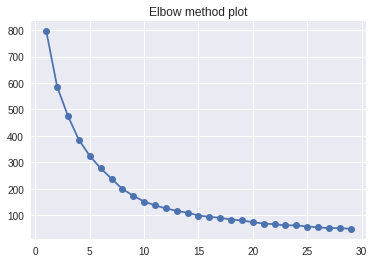

In [0]:
plt.plot(ks, inertias, marker='o')
plt.title("Elbow method plot")